In [75]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [76]:
housing = fetch_california_housing()

In [77]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [78]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["target"] = housing.target

In [79]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [80]:
# Eu tenho a hipótese de que alguns features desse dataset não têm muita relação com o target que é sobre o valor médio da casa em si, 
# como por exemplo a população. Acho que é bom fazer várias hipóteses para testar esse pensamento, em cada hipótese tirar ou não algumas features.

<Axes: >

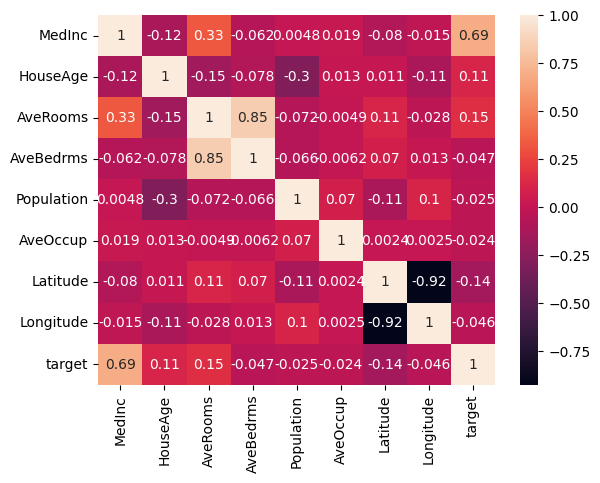

In [81]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)

Text(0.5, 1.0, 'Método do Cotovelo')

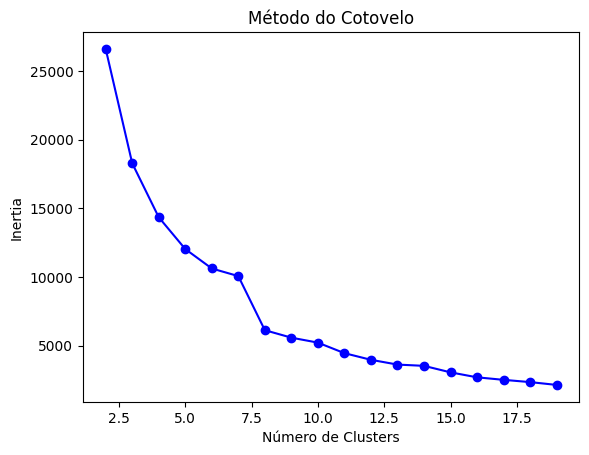

In [82]:
inertias = []
K_range = range(2, 20)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[["Latitude","Longitude"]])
    inertias.append(kmeans.inertia_)

plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método do Cotovelo')

In [83]:
kmeans = KMeans(n_clusters=7)
df["neighborhood_cluster"] = kmeans.fit_predict(df[["Latitude", "Longitude"]])

In [84]:
df[df["neighborhood_cluster"]==6]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,neighborhood_cluster
1053,3.1142,12.0,5.538592,1.082254,4644.0,2.616338,39.76,-121.83,1.12600,6
1054,3.0068,23.0,5.230635,0.971279,2710.0,2.358573,39.76,-121.82,1.07300,6
1055,3.0905,12.0,5.122490,1.056225,3628.0,2.428380,39.78,-121.86,1.17800,6
1056,1.9362,17.0,4.397832,0.981651,2446.0,2.040033,39.77,-121.85,0.89900,6
1057,2.3155,14.0,4.290146,1.131387,1215.0,2.217153,39.76,-121.84,1.02300,6
...,...,...,...,...,...,...,...,...,...,...
19802,0.5360,36.0,12.250000,3.500000,18.0,2.250000,40.31,-123.17,0.14999,6
19803,2.8472,27.0,12.320000,2.993333,396.0,2.640000,40.16,-123.22,0.41300,6
19804,2.7083,19.0,6.475000,1.350000,216.0,2.700000,40.34,-123.48,0.64500,6
19805,3.6250,20.0,3.594595,0.945946,87.0,2.351351,40.22,-123.43,0.67500,6


In [85]:
hipotese1 = df[["MedInc", "target"]].copy()
hipotese2 = df[["MedInc", "HouseAge", "AveRooms","target"]].copy()
hipotese3 = df[["MedInc", "HouseAge", "AveRooms", "Latitude", "Longitude", "target"]].copy()
hipotese4 = df[["MedInc", "HouseAge", "AveRooms", "neighborhood_cluster", "target"]].copy()
hipotese5 = df.copy()

In [86]:
hipotese1["MedIncMinMax"] = (hipotese1["MedInc"] - hipotese1["MedInc"].min()) / (hipotese1["MedInc"].max() - hipotese1["MedInc"].min())
hipotese1["MedIncZscore"] = (hipotese1["MedInc"] - hipotese1["MedInc"].mean()) / hipotese1["MedInc"].std()

##########################################################################################################

hipotese2["MedIncMinMax"] = (hipotese2["MedInc"] - hipotese2["MedInc"].min()) / (hipotese2["MedInc"].max() - hipotese2["MedInc"].min())
hipotese2["MedIncZscore"] = (hipotese2["MedInc"] - hipotese2["MedInc"].mean()) / hipotese2["MedInc"].std()

hipotese2["HouseAgeMinMax"] = (hipotese2["HouseAge"] - hipotese2["HouseAge"].min()) / (hipotese2["HouseAge"].max() - hipotese2["HouseAge"].min())
hipotese2["HouseAgeZscore"] = (hipotese2["HouseAge"] - hipotese2["HouseAge"].mean()) / hipotese2["HouseAge"].std()

hipotese2["AveRoomsMinMax"] = (hipotese2["AveRooms"] - hipotese2["AveRooms"].min()) / (hipotese2["AveRooms"].max() - hipotese2["AveRooms"].min())
hipotese2["AveRoomsZscore"] = (hipotese2["AveRooms"] - hipotese2["AveRooms"].mean()) / hipotese2["AveRooms"].std()

############################################################################################################

hipotese3["MedIncMinMax"] = (hipotese3["MedInc"] - hipotese3["MedInc"].min()) / (hipotese3["MedInc"].max() - hipotese3["MedInc"].min())
hipotese3["MedIncZscore"] = (hipotese3["MedInc"] - hipotese3["MedInc"].mean()) / hipotese3["MedInc"].std()

hipotese3["HouseAgeMinMax"] = (hipotese3["HouseAge"] - hipotese3["HouseAge"].min()) / (hipotese3["HouseAge"].max() - hipotese3["HouseAge"].min())
hipotese3["HouseAgeZscore"] = (hipotese3["HouseAge"] - hipotese3["HouseAge"].mean()) / hipotese3["HouseAge"].std()

hipotese3["AveRoomsMinMax"] = (hipotese3["AveRooms"] - hipotese3["AveRooms"].min()) / (hipotese3["AveRooms"].max() - hipotese3["AveRooms"].min())
hipotese3["AveRoomsZscore"] = (hipotese3["AveRooms"] - hipotese3["AveRooms"].mean()) / hipotese3["AveRooms"].std()

hipotese3["LatitudeMinMax"] = (hipotese3["Latitude"] - hipotese3["Latitude"].min()) / (hipotese3["Latitude"].max() - hipotese3["Latitude"].min())
hipotese3["LatitudeZscore"] = (hipotese3["Latitude"] - hipotese3["Latitude"].mean()) / hipotese3["Latitude"].std()

hipotese3["LongitudeMinMax"] = (hipotese3["Longitude"] - hipotese3["Longitude"].min()) / (hipotese3["Longitude"].max() - hipotese3["Longitude"].min())
hipotese3["LongitudeZscore"] = (hipotese3["Longitude"] - hipotese3["Longitude"].mean()) / hipotese3["Longitude"].std()

############################################################################################################

hipotese4["MedIncMinMax"] = (hipotese4["MedInc"] - hipotese4["MedInc"].min()) / (hipotese4["MedInc"].max() - hipotese4["MedInc"].min())
hipotese4["MedIncZscore"] = (hipotese4["MedInc"] - hipotese4["MedInc"].mean()) / hipotese4["MedInc"].std()

hipotese4["HouseAgeMinMax"] = (hipotese4["HouseAge"] - hipotese4["HouseAge"].min()) / (hipotese4["HouseAge"].max() - hipotese4["HouseAge"].min())
hipotese4["HouseAgeZscore"] = (hipotese4["HouseAge"] - hipotese4["HouseAge"].mean()) / hipotese4["HouseAge"].std()

hipotese4["AveRoomsMinMax"] = (hipotese4["AveRooms"] - hipotese4["AveRooms"].min()) / (hipotese4["AveRooms"].max() - hipotese4["AveRooms"].min())
hipotese4["AveRoomsZscore"] = (hipotese4["AveRooms"] - hipotese4["AveRooms"].mean()) / hipotese4["AveRooms"].std()

hipotese4["NeighClusterMinMax"] = (hipotese4["neighborhood_cluster"] - hipotese4["neighborhood_cluster"].min()) / (hipotese4["neighborhood_cluster"].max() - hipotese4["neighborhood_cluster"].min())
hipotese4["NeighClusterZscore"] = (hipotese4["neighborhood_cluster"] - hipotese4["neighborhood_cluster"].mean()) / hipotese4["neighborhood_cluster"].std()

############################################################################################################

hipotese5["MedIncMinMax"] = (hipotese5["MedInc"] - hipotese5["MedInc"].min()) / (hipotese5["MedInc"].max() - hipotese5["MedInc"].min())
hipotese5["MedIncZscore"] = (hipotese5["MedInc"] - hipotese5["MedInc"].mean()) / hipotese5["MedInc"].std()

hipotese5["HouseAgeMinMax"] = (hipotese5["HouseAge"] - hipotese5["HouseAge"].min()) / (hipotese5["HouseAge"].max() - hipotese5["HouseAge"].min())
hipotese5["HouseAgeZscore"] = (hipotese5["HouseAge"] - hipotese5["HouseAge"].mean()) / hipotese5["HouseAge"].std()

hipotese5["AveRoomsMinMax"] = (hipotese5["AveRooms"] - hipotese5["AveRooms"].min()) / (hipotese5["AveRooms"].max() - hipotese5["AveRooms"].min())
hipotese5["AveRoomsZscore"] = (hipotese5["AveRooms"] - hipotese5["AveRooms"].mean()) / hipotese5["AveRooms"].std()

hipotese5["AveBedrmsMinMax"] = (hipotese5["AveBedrms"] - hipotese5["AveBedrms"].min()) / (hipotese5["AveBedrms"].max() - hipotese5["AveBedrms"].min())
hipotese5["AveBedrmsZscore"] = (hipotese5["AveBedrms"] - hipotese5["AveBedrms"].mean()) / hipotese5["AveBedrms"].std()

hipotese5["PopulationMinMax"] = (hipotese5["Population"] - hipotese5["Population"].min()) / (hipotese5["Population"].max() - hipotese5["Population"].min())
hipotese5["PopulationZscore"] = (hipotese5["Population"] - hipotese5["Population"].mean()) / hipotese5["Population"].std()

hipotese5["AveOccupMinMax"] = (hipotese5["AveOccup"] - hipotese5["AveOccup"].min()) / (hipotese5["AveOccup"].max() - hipotese5["AveOccup"].min())
hipotese5["AveOccupZscore"] = (hipotese5["AveOccup"] - hipotese5["AveOccup"].mean()) / hipotese5["AveOccup"].std()

hipotese5["LatitudeMinMax"] = (hipotese5["Latitude"] - hipotese5["Latitude"].min()) / (hipotese5["Latitude"].max() - hipotese5["Latitude"].min())
hipotese5["LatitudeZscore"] = (hipotese5["Latitude"] - hipotese5["Latitude"].mean()) / hipotese5["Latitude"].std()

hipotese5["LongitudeMinMax"] = (hipotese5["Longitude"] - hipotese5["Longitude"].min()) / (hipotese5["Longitude"].max() - hipotese5["Longitude"].min())
hipotese5["LongitudeZscore"] = (hipotese5["Longitude"] - hipotese5["Longitude"].mean()) / hipotese5["Longitude"].std()

hipotese5.drop(columns=["neighborhood_cluster"],inplace=True)



In [87]:
hipotese1.columns

Index(['MedInc', 'target', 'MedIncMinMax', 'MedIncZscore'], dtype='object')

In [88]:
hipotese1["MedInc"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [89]:
hipotese1["MedInc"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64

In [90]:
hipotese1["target"].sum

<bound method Series.sum of 0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64>

In [91]:
(hipotese1["MedInc"] * hipotese1["target"]).sum()

np.float64(196391.86763064)

In [92]:
######################################################################
### Tentativa de fazer a Descida de gradiente no primeiro exemplo ####
######################################################################

In [93]:
nIteracoes = 1000
α = 0.01 #taxa de aprendizado
theta0 = 0
theta1 = 0

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(
    hipotese1["MedInc"].values,
    hipotese2["target"].values,
    test_size=0.2,
    random_state=42
)

m = len(X_train)

In [95]:
# Implementação da Descida de Gradiente

for n in range(nIteracoes):
    # Calcular vetor previsões
    previsoes = theta0 + theta1 * X_train

    # Calcular vetor erros
    erros = previsoes - Y_train

    # Calcular derivadas parciais
    derivadaTheta0 = (1/m) * erros.sum()
    derivadaTheta1 = (1/m) * (erros * X_train).sum()

    # Atualizar parâmetros (SUBTRAÇÃO com taxa de aprendizado)
    theta0 = theta0 - α * derivadaTheta0
    theta1 = theta1 - α * derivadaTheta1

In [96]:
previsoes_teste = theta0 + theta1 * X_test

mse = np.mean((previsoes_teste - Y_test)**2)
print(f"Erro quadrático médio no teste: {mse:.2f}")
print(f"RMSE (raiz do erro quadrático médio): {np.sqrt(mse):.2f}")
print(f"\nParâmetros do modelo:")
print(f"theta0 (intercepto): {theta0:.4f}")
print(f"theta1 (coeficiente): {theta1:.4f}")

Erro quadrático médio no teste: 0.71
RMSE (raiz do erro quadrático médio): 0.84

Parâmetros do modelo:
theta0 (intercepto): 0.3915
theta1 (coeficiente): 0.4305


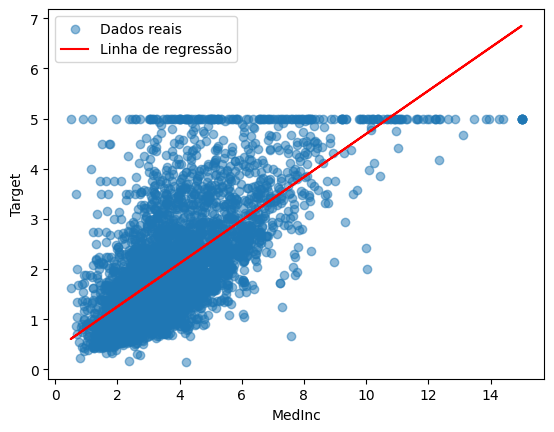

In [97]:
plt.scatter(X_test, Y_test, alpha=0.5, label='Dados reais')
plt.plot(X_test, previsoes_teste, 'r-', label='Linha de regressão')
plt.xlabel('MedInc')
plt.ylabel('Target')
plt.legend()
plt.show()